In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import datetime as dt
from scripts import pumpitup

from scipy import stats

from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import KFold

sns.set_style("white")
sns.set_context("talk")

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
train_data = pd.read_csv('data/training_set.csv')

# KNN Imputation

For some of this workbook, I used a K Nearest Neighbours algorithm to impute missing data where using the mean, median or mode was not appropriate, and other methods were not applicable.

List of previous KNN imputations.

So let's see how it stacks up.

## GPS Height

The first feature that I applied this technique to was `gps_height`. Let's just remind ourselves of what the original data looked like.

In [3]:
viridis = plt.cm.get_cmap('viridis')

In [7]:
le = preprocessing.LabelEncoder()

In [8]:
gps_height_encoded = pumpitup.label_encode(train_data['gps_height'][train_data['gps_height'] > 0], le)
gps_height_encoded_norm = gps_height_encoded / gps_height_encoded.max()
gps_height_cmap = [viridis(x) for x in gps_height_encoded_norm]

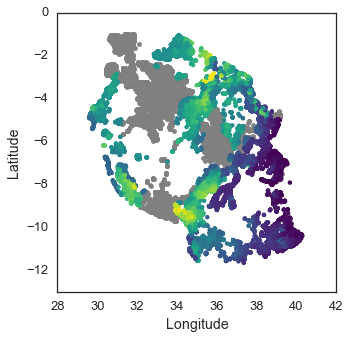

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.scatter(train_data['longitude'][train_data['gps_height'] == 0],\
           train_data['latitude'][train_data['gps_height'] == 0], color='gray')
ax.scatter(train_data['longitude'][train_data['gps_height'] > 0],\
           train_data['latitude'][train_data['gps_height'] > 0], c=gps_height_cmap, linewidth=0)
ax.set_ylim(-13, 0)
ax.set_xlim(28, 42)
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')

As we can see, we have large patches of missing 